## 1-Data

## Libraries import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data extraction

In [2]:
train = []
test = []
all_data = []

labels = {'R':-1,'M':1}
y_train = []
y_test = []
y_all_data = []

file_name = [['M',"data/in/sonar.mines"],['R',"data/in/sonar.rocks"]]
for file in file_name:
    f = open(file[1], "r")
    Lines = f.readlines()
    count = 0
    action = False
    data_type = ''
    # Strips the newline character
    data = []
    for line in Lines:

        if line[0] == '*':
            action = True
            data_type = 'Train'

        elif line[0] == 'C':
            action = True
            data_type = 'Test'
            
        else:
            if action == True :
                l = line.split()
                if len(l) == 6:
                    data.extend(l)
                if len(l) == 0:
                    data[0] = data[0][1:]
                    data[len(data) - 1] = data[len(data) - 1][:-1] 
                    data = np.array(data)
                    data = data.astype(np.float)
                    if data_type == 'Train':
                        train.append(list(data))
                        y_train.append(labels[file[0]])
                        all_data.append(list(data))
                        y_all_data.append(labels[file[0]])
                    else:
                        test.append(list(data))
                        y_test.append(labels[file[0]])
                        all_data.append(list(data))
                        y_all_data.append(labels[file[0]])
                    data = []
                    action = False


print('Number of training examples : ',len(train))
print('Number of testing examples : ',len(test))
print('Total number of examples : ',len(all_data))

# Saving the training, testing data in separate files

np.savetxt("data/out/train.txt", np.array(train), fmt="%s")
np.savetxt("data/out/train_labels.txt", np.array(y_train), fmt="%s")
np.savetxt("data/out/test.txt", np.array(test), fmt="%s")
np.savetxt("data/out/test_labels.txt", np.array(y_test), fmt="%s")
np.savetxt("data/out/all_data.txt", np.array(all_data), fmt="%s")
np.savetxt("data/out/all_data_labels.txt", np.array(y_all_data), fmt="%s")

Number of training examples :  104
Number of testing examples :  104
Total number of examples :  208


## PARTIE I

## 1-Data reading

In [3]:
my_train = np.loadtxt("data/out/train.txt")
my_test = np.loadtxt("data/out/test.txt")
my_all_data = np.loadtxt("data/out/all_data.txt")

my_y_train = np.loadtxt("data/out/train_labels.txt")
my_y_test = np.loadtxt("data/out/test_labels.txt")
my_y_all_data = np.loadtxt("data/out/all_data_labels.txt")

#### Pour ce TP j'ai choisi le perceptron version batch, car il requière moins d'itération et est efficace sur des données de petite taille.

In [4]:
def perceptron_batch(P, N, X, tau, alpha, nb_epochs):
    # Random initialization of the weights W
    W = np.zeros((N+1,1))
    stop = False
    
    for k in range(nb_epochs):
        Dw = np.zeros((N+1,1))
        ones = np.ones((P,1))
        X_new = np.append(ones,X,axis=1)
        y = np.sign(X_new@W)
        
        # Verification that all data has been properly classified
        if np.array_equal(y,tau):
            stop = True
            break
        else:
            # Update of the weights
            Dw = alpha*X_new.T@(tau - y)
            W = W + Dw
            
    return W

## Plotting the data and the stability separation plan

In [17]:
def plot_(X, tau, W, title):
    d = np.unique(tau)
    # Plotting the examples and their corresponding stability
    for k in d:
        data = X[tau.squeeze()==k]
        plt.scatter(data[:,0],data[:,1])
        
    t = np.linspace(min(X[:,0]),max(X[:,0]),30)
    plt.plot(t,[0]*30,'.r')
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Stabilities')
    plt.show()

## Function to predict the output

In [6]:
def predict(X, W):
    ones = np.ones((len(X),1))
    X_new = np.append(ones,X,axis=1)
    return X_new@W
    

## Function to compute the number of misclassified examples

In [7]:
def compute_nb_errors(X, W, tau):
    y = np.sign(predict(X, W))
    return np.sum(y != tau)

## Function to compute the stability

In [8]:
def gamma(X, W, tau):
    return (tau*predict(X, W))/np.linalg.norm(W)

## 2- Learning on «train»

Ea =  24
Eg =  22
W Batch=  
 [ -864.       804.4867  1464.4502   402.7778  1061.6543   769.3507
  1056.8033  -426.5035 -1295.1704    -2.6144   628.4211   645.3496
   130.0776   -80.8917   -55.7648   767.8477 -1582.6024  -453.7026
  1512.7715  -282.9657   -87.9049   -87.7188   272.0584  -271.443
   874.6978  -136.5741   -58.1994    80.9702  -135.5834   -52.7196
  1508.4439 -2233.8148  1553.7517  -789.9826   262.724   -185.8409
  -240.8443  -319.9525   124.9878   953.3608 -1065.2541   362.3652
  -228.8695    86.3385  -397.407    880.897    759.0144  -416.0001
  1566.3771  2124.4734  -601.7272   352.7181   349.1906   129.7972
   513.6186  -111.187   -112.958   -312.9018   244.9508   -44.2367
   -55.2971]


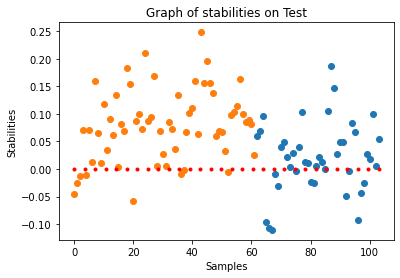

In [18]:
P = 104
N = 60
tau = my_y_train.reshape((P,1))
alpha = 1
nb_epochs = 10000

# Calculation of the perceptrons W 
W = perceptron_batch(P, N, my_train, tau, alpha, nb_epochs)


print('Ea = ',compute_nb_errors(my_train, W, my_y_train.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_test, W, my_y_test.reshape((P,1))))
print('W Batch= ','\n', W.squeeze())
d = gamma(my_test, W, my_y_test.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_test.reshape((P,1)), W, "Graph of stabilities on Test")

## 3-Learning on « test »

Ea =  0
Eg =  25
W Batch=  
 [-330.       68.4036 -115.6928  -77.1687  116.4735   51.9442 -322.4115
 -600.324   -29.6278  434.5858  182.0178  711.3943  492.0714   39.856
 -115.0664 -350.869   194.8936   24.2127 -198.7255  -60.0215  109.1422
  170.4069   59.2216  183.532   184.5585 -266.4672 -273.8986   36.8834
  229.2696   15.9898   18.6955 -220.6403   96.5759  -70.8597 -276.8579
  141.4849 -168.4648 -612.8069  -54.1783  351.1809 -255.0477  116.6618
  148.7199  479.8864  616.5344  336.3181   35.4407   75.6207  242.2253
    4.3196  -41.2368   98.0436   67.5738   27.1839   17.5199    4.4768
   16.2487   24.8492   19.9082   73.0839   10.1496]


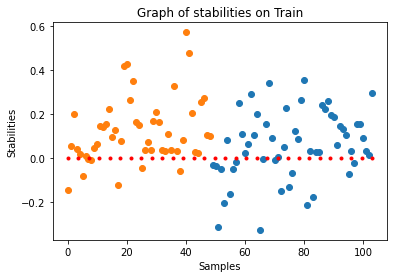

In [19]:
P = 104
N = 60
tau = my_y_test.reshape((P,1))
alpha = 1
nb_epochs = 10000

# Calculation of the perceptrons W
W = perceptron_batch(P, N, my_test, tau, alpha, nb_epochs)


print('Ea = ',compute_nb_errors(my_test, W, my_y_test.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_train, W, my_y_train.reshape((P,1))))
print('W Batch= ','\n', W.squeeze())
d = gamma(my_train, W, my_y_train.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_train.reshape((P,1)), W, "Graph of stabilities on Train")

# PARTIE II

## Pocket learning algorithm 

In [21]:
def pocket(P, N, X, tau, alpha, nb_epochs, Ea_limit, W_init):
    
    # Initialization of the weights W
    W = W_init
    W_pocket = W.copy()
    
    stop = False
    prev_nb_errors = len(tau)
    nb_errors = len(tau)
    for k in range(nb_epochs):
        
        Dw = np.zeros((N+1,1))
        ones = np.ones((P,1))
        X_new = np.append(ones,X,axis=1)
        y = np.sign(X_new@W)
        
        # Verification that all data has been properly classified
        if not np.array_equal(y,tau):
            
            # Update of the weights
            Dw = X_new.T@(tau - y)
            W = W + Dw
            nb_errors = compute_nb_errors(X, W, tau)
        
        # Check if the number of error limits has been reached
        if nb_errors < prev_nb_errors:
            prev_nb_errors = nb_errors
            W_pocket = W.copy()

        if nb_errors <= Ea_limit:
            break
            
    return W_pocket

## Different initialisation

In [20]:
def hebb(P, N, X, tau):
    
    W = np.zeros((N+1,1))
    ones = np.ones((P,1))
    X_new = np.append(ones,X,axis=1)

    W = W + (X_new.T@tau).reshape((N+1,1))
    return W

In [22]:
# W_init_zeros = np.zeros((N+1,1))
# W_init_random = np.random.uniform(-1,1,(N+1,1))
# W_init_hebb = hebb(P, N, X, tau)

## Learning on «train»

********** Results with Zeros Initialization **********
Ea =  5
Eg =  23
W Pocket with zeros initialization =  
 [-8.5000000e+02  7.3472230e+02  1.2266848e+03  4.2792460e+02
  9.9732070e+02  8.0421750e+02  8.6760690e+02 -3.4086170e+02
 -1.2202984e+03 -5.5300000e-01  4.9353530e+02  7.0422940e+02
  1.4811960e+02 -1.3323490e+02 -3.9528600e+01  7.0729630e+02
 -1.3847908e+03 -3.9031360e+02  1.2272099e+03 -2.2318090e+02
 -6.3812300e+01 -7.9348000e+00  1.3668380e+02 -1.9158440e+02
  7.6104580e+02 -1.3649050e+02 -8.1623200e+01  7.1181800e+01
 -2.2206120e+02  5.9354200e+01  1.2258683e+03 -1.8914654e+03
  1.2318171e+03 -4.7521900e+02  2.9380800e+01 -8.7543700e+01
 -2.5353830e+02 -2.7069830e+02  2.0886140e+02  6.7376660e+02
 -8.7880410e+02  2.9364800e+02 -2.4151610e+02  1.4068890e+02
 -2.6154880e+02  7.1032260e+02  5.9071360e+02 -1.1138390e+02
  1.3444869e+03  1.7311398e+03 -3.7585520e+02  2.7524770e+02
  2.8508920e+02  9.4343000e+01  3.7933200e+02 -1.0408740e+02
 -7.0798000e+01 -2.2461280e+02  1

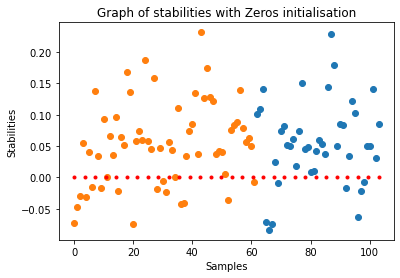

********** Results with Random Initialization **********
Ea =  5
Eg =  25
W Pocket with random initialization =  
 [-8.32759338e+02  7.14249074e+02  1.18274346e+03  4.41559233e+02
  9.82007213e+02  8.13254174e+02  8.33818061e+02 -3.30483824e+02
 -1.20464711e+03 -1.10569947e+00  4.65500282e+02  7.17979901e+02
  1.42543618e+02 -1.38460853e+02 -3.33072667e+01  6.73356863e+02
 -1.32957083e+03 -3.63384763e+02  1.16514305e+03 -2.04612151e+02
 -6.19243451e+01  1.34903859e+01  1.28085831e+02 -1.74722006e+02
  7.31770687e+02 -1.33037937e+02 -8.83943487e+01  5.35047456e+01
 -2.37812442e+02  7.66237983e+01  1.17635891e+03 -1.81651034e+03
  1.17436590e+03 -4.08316404e+02 -1.39545175e+01 -5.79484559e+01
 -2.46014968e+02 -2.50775621e+02  2.25431217e+02  6.17394981e+02
 -8.41661592e+02  2.94618558e+02 -2.58776514e+02  1.30480335e+02
 -2.34165194e+02  6.76800895e+02  5.46341992e+02 -5.16434689e+01
  1.29573641e+03  1.64512456e+03 -3.36399716e+02  2.59428328e+02
  2.72082929e+02  9.26768555e+01  3.5075

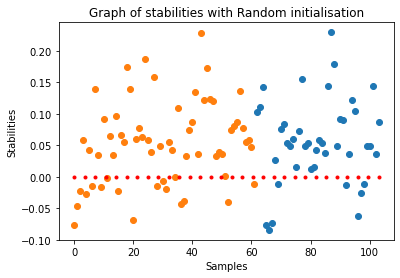

********** Results with Hebb Initialization **********
Ea =  5
Eg =  23
W Pocket with hebb =  
 [-8.5000000e+02  7.3472230e+02  1.2266848e+03  4.2792460e+02
  9.9732070e+02  8.0421750e+02  8.6760690e+02 -3.4086170e+02
 -1.2202984e+03 -5.5300000e-01  4.9353530e+02  7.0422940e+02
  1.4811960e+02 -1.3323490e+02 -3.9528600e+01  7.0729630e+02
 -1.3847908e+03 -3.9031360e+02  1.2272099e+03 -2.2318090e+02
 -6.3812300e+01 -7.9348000e+00  1.3668380e+02 -1.9158440e+02
  7.6104580e+02 -1.3649050e+02 -8.1623200e+01  7.1181800e+01
 -2.2206120e+02  5.9354200e+01  1.2258683e+03 -1.8914654e+03
  1.2318171e+03 -4.7521900e+02  2.9380800e+01 -8.7543700e+01
 -2.5353830e+02 -2.7069830e+02  2.0886140e+02  6.7376660e+02
 -8.7880410e+02  2.9364800e+02 -2.4151610e+02  1.4068890e+02
 -2.6154880e+02  7.1032260e+02  5.9071360e+02 -1.1138390e+02
  1.3444869e+03  1.7311398e+03 -3.7585520e+02  2.7524770e+02
  2.8508920e+02  9.4343000e+01  3.7933200e+02 -1.0408740e+02
 -7.0798000e+01 -2.2461280e+02  1.9462040e+02 -1.9

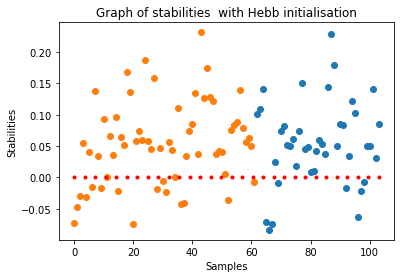

In [23]:
P = 104
N = 60
tau = my_y_train.reshape((P,1))
alpha = 1
nb_epochs = 10000
Ea_limit = 3

###################### With Zeros Initialization ############################

print('*'*10,'Results with Zeros Initialization','*'*10)
W_init_zeros = np.zeros((N+1,1))
W_zeros = pocket(P, N, my_train, tau, alpha, nb_epochs, Ea_limit, W_init_zeros)

print('Ea = ',compute_nb_errors(my_train, W_zeros, my_y_train.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_test, W_zeros, my_y_test.reshape((P,1))))
print('W Pocket with zeros initialization = ','\n', W_zeros.squeeze())
d = gamma(my_test, W_zeros, my_y_test.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_test.reshape((P,1)), W_zeros, "Graph of stabilities with Zeros initialisation")


###################### With Random Initialization ############################

print('*'*10,'Results with Random Initialization','*'*10)
W_init_random = np.random.uniform(-1,1,(N+1,1))
W_rand = pocket(P, N, my_train, tau, alpha, nb_epochs, Ea_limit, W_init_random)

print('Ea = ',compute_nb_errors(my_train, W_rand, my_y_train.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_test, W_rand, my_y_test.reshape((P,1))))
print('W Pocket with random initialization = ','\n', W_rand.squeeze())
d = gamma(my_test, W_rand, my_y_test.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_test.reshape((P,1)), W_rand, "Graph of stabilities with Random initialisation")

###################### With Hebb Initialization ##############################

print('*'*10,'Results with Hebb Initialization','*'*10)
W_init_hebb = hebb(P, N, my_train, tau)
W_hebb = pocket(P, N, my_train, tau, alpha, nb_epochs, Ea_limit, W_init_hebb)

print('Ea = ',compute_nb_errors(my_train, W_hebb, my_y_train.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_test, W_hebb, my_y_test.reshape((P,1))))
print('W Pocket with hebb = ','\n', W_hebb.squeeze())
d = gamma(my_test, W_hebb, my_y_test.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_test.reshape((P,1)), W_hebb, "Graph of stabilities  with Hebb initialisation")

## Learning on « test »

********** Results with Zeros Initialization **********
Ea =  0
Eg =  25
W Pocket with zeros initialization =  
 [-330.       68.4036 -115.6928  -77.1687  116.4735   51.9442 -322.4115
 -600.324   -29.6278  434.5858  182.0178  711.3943  492.0714   39.856
 -115.0664 -350.869   194.8936   24.2127 -198.7255  -60.0215  109.1422
  170.4069   59.2216  183.532   184.5585 -266.4672 -273.8986   36.8834
  229.2696   15.9898   18.6955 -220.6403   96.5759  -70.8597 -276.8579
  141.4849 -168.4648 -612.8069  -54.1783  351.1809 -255.0477  116.6618
  148.7199  479.8864  616.5344  336.3181   35.4407   75.6207  242.2253
    4.3196  -41.2368   98.0436   67.5738   27.1839   17.5199    4.4768
   16.2487   24.8492   19.9082   73.0839   10.1496]


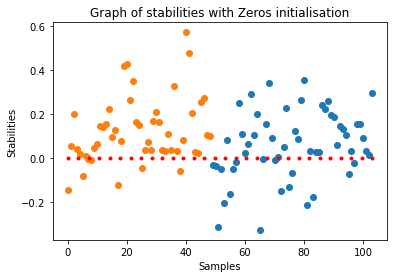

********** Results with Random Initialization **********
Ea =  0
Eg =  25
W Pocket with random initialization =  
 [-327.6794919    68.52593265 -114.77632248  -77.09029957  112.13950514
   50.48785759 -320.22340856 -595.64622373  -34.42369944  432.14788747
  178.12064232  701.42757864  489.09963763   35.32269425 -120.69639587
 -351.55093128  193.02172596   28.03066214 -191.50938123  -61.03925175
  103.63405745  159.72330289   50.98492526  188.04238363  192.58085415
 -266.87949969 -282.36356707   28.92134595  216.65678524   15.28248062
   25.46460031 -209.24568587  108.38859946  -65.15277936 -272.49306614
  143.48267121 -168.98890321 -612.81819893  -62.25828505  338.64229418
 -254.32696285  117.79127335  150.45899247  479.15173184  621.60345612
  338.98931959   36.34124002   77.01555387  240.78073538    2.63451922
  -41.82217636   96.11751383   67.56570762   25.54896131   17.4119858
    4.93255395   16.15917771   24.08666504   19.39831083   72.01682298
   10.84477657]


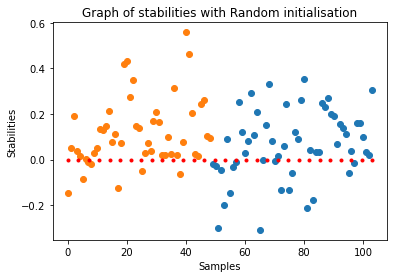

********** Results with Hebb Initialization **********
Ea =  0
Eg =  25
W Pocket with hebb =  
 [-330.       68.4036 -115.6928  -77.1687  116.4735   51.9442 -322.4115
 -600.324   -29.6278  434.5858  182.0178  711.3943  492.0714   39.856
 -115.0664 -350.869   194.8936   24.2127 -198.7255  -60.0215  109.1422
  170.4069   59.2216  183.532   184.5585 -266.4672 -273.8986   36.8834
  229.2696   15.9898   18.6955 -220.6403   96.5759  -70.8597 -276.8579
  141.4849 -168.4648 -612.8069  -54.1783  351.1809 -255.0477  116.6618
  148.7199  479.8864  616.5344  336.3181   35.4407   75.6207  242.2253
    4.3196  -41.2368   98.0436   67.5738   27.1839   17.5199    4.4768
   16.2487   24.8492   19.9082   73.0839   10.1496]


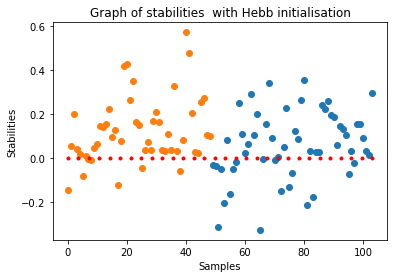

In [24]:
P = 104
N = 60
tau = my_y_test.reshape((P,1))
alpha = 1
nb_epochs = 10000
Ea_limit = 0

###################### With Zeros Initialization ############################

print('*'*10,'Results with Zeros Initialization','*'*10)
W_init_zeros = np.zeros((N+1,1))
W_zeros = pocket(P, N, my_test, tau, alpha, nb_epochs, Ea_limit, W_init_zeros)

print('Ea = ',compute_nb_errors(my_test, W_zeros, my_y_test.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_train, W_zeros, my_y_train.reshape((P,1))))
print('W Pocket with zeros initialization = ','\n', W_zeros.squeeze())
d = gamma(my_train, W_zeros, my_y_train.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_train.reshape((P,1)), W_zeros, "Graph of stabilities with Zeros initialisation")


###################### With Random Initialization ############################

print('*'*10,'Results with Random Initialization','*'*10)
W_init_random = np.random.uniform(-1,1,(N+1,1))
W_rand = pocket(P, N, my_test, tau, alpha, nb_epochs, Ea_limit, W_init_random)

print('Ea = ',compute_nb_errors(my_test, W_rand, my_y_test.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_train, W_rand, my_y_train.reshape((P,1))))
print('W Pocket with random initialization = ','\n', W_rand.squeeze())
d = gamma(my_train, W_rand, my_y_train.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_train.reshape((P,1)), W_rand, "Graph of stabilities with Random initialisation")

###################### With Hebb Initialization ##############################

print('*'*10,'Results with Hebb Initialization','*'*10)
W_init_hebb = hebb(P, N, my_test, tau)
W_hebb = pocket(P, N, my_test, tau, alpha, nb_epochs, Ea_limit, W_init_hebb)

print('Ea = ',compute_nb_errors(my_test, W_hebb, my_y_test.reshape((P,1))))
print('Eg = ',compute_nb_errors(my_train, W_hebb, my_y_train.reshape((P,1))))
print('W Pocket with hebb = ','\n', W_hebb.squeeze())
d = gamma(my_train, W_hebb, my_y_train.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_train.reshape((P,1)), W_hebb, "Graph of stabilities  with Hebb initialisation")

# PARTIE III

## Learning on « train + test »

********** Results with Zeros Initialization **********
Ea =  15
W Pocket with zeros initialization =  
 [-1426.      3991.1097   -79.3568 -6879.3543  4931.7784  -211.2017
  1386.4506 -2526.1155 -1214.021   2000.302  -1420.4445  2256.3717
   916.21     -27.6603  -493.4672   770.5027  -851.012  -1220.8765
  1318.7082  -772.1652  1392.8941 -1788.4353  2320.7324 -1894.3106
  2713.7687 -1115.4235  -404.4316   645.5252  -336.954   -237.4774
  2140.4352 -3321.3377  1545.7536   223.1865 -1207.2423  1920.707
 -2069.9809  -213.5978    61.4023  1456.3571 -2138.4626   532.0084
   499.6868   125.3407   877.5096   189.5805   537.3851  -574.4428
  3571.4146  5260.7126 -5921.2838  4560.8127  3774.5516  2818.4461
  1976.7553  -465.3034  -873.6113 -1870.3702  2529.9342  2573.5448
  1846.0751]


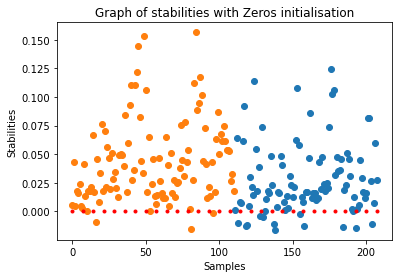

********** Results with Random Initialization **********
Ea =  16
W Pocket with random initialization =  
 [-1412.99951824  3068.09689666   305.11530337 -4635.59256713
  4307.91181222   247.60700819   720.43226491 -2287.28426678
 -1432.30799119  1839.788858   -1119.53305139  2396.11799788
   651.0346231    -13.57131325  -404.22706867   580.979957
  -555.0853227  -1311.32290937  1352.84803516  -601.11426603
   853.14456709 -1082.54907505  1541.99653723 -1225.69493583
  2263.51925877  -942.29592713  -339.21489966   522.09322787
  -313.9672293   -126.32745909  1912.05422585 -3131.69841769
  1501.64308935   214.16112572 -1053.25893683  1668.09942048
 -1891.51678862  -303.43191991   111.47730431  1324.17771704
 -2062.5274467    560.96257802   140.68645659   470.06184022
   563.98198936   711.34842733   210.26124259  -191.89321937
  3353.82603739  4136.72235397 -3561.20716942  2990.74119271
  2479.77239104  1742.69953367  1396.56842525  -244.14059467
  -491.64606737 -1129.70214471  1661.3486

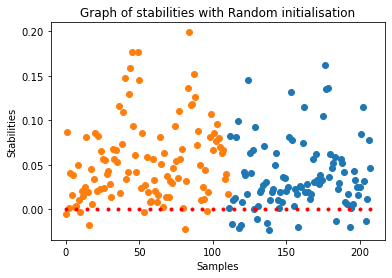

********** Results with Hebb Initialization **********
Ea =  15
W Pocket with hebb =  
 [-1426.      3991.1097   -79.3568 -6879.3543  4931.7784  -211.2017
  1386.4506 -2526.1155 -1214.021   2000.302  -1420.4445  2256.3717
   916.21     -27.6603  -493.4672   770.5027  -851.012  -1220.8765
  1318.7082  -772.1652  1392.8941 -1788.4353  2320.7324 -1894.3106
  2713.7687 -1115.4235  -404.4316   645.5252  -336.954   -237.4774
  2140.4352 -3321.3377  1545.7536   223.1865 -1207.2423  1920.707
 -2069.9809  -213.5978    61.4023  1456.3571 -2138.4626   532.0084
   499.6868   125.3407   877.5096   189.5805   537.3851  -574.4428
  3571.4146  5260.7126 -5921.2838  4560.8127  3774.5516  2818.4461
  1976.7553  -465.3034  -873.6113 -1870.3702  2529.9342  2573.5448
  1846.0751]


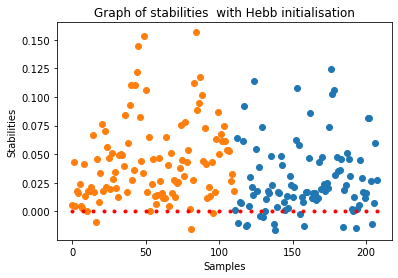

In [25]:
P = 208
N = 60
tau = my_y_all_data.reshape((P,1))
alpha = 1
nb_epochs = 50000
Ea_limit = 0

###################### With Zeros Initialization ############################

print('*'*10,'Results with Zeros Initialization','*'*10)
W_init_zeros = np.zeros((N+1,1))
W_zeros = pocket(P, N, my_all_data, tau, alpha, nb_epochs, Ea_limit, W_init_zeros)

print('Ea = ',compute_nb_errors(my_all_data, W_zeros, my_y_all_data.reshape((P,1))))
print('W Pocket with zeros initialization = ','\n', W_zeros.squeeze())
d = gamma(my_all_data, W_zeros, my_y_all_data.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_all_data.reshape((P,1)), W_zeros, "Graph of stabilities with Zeros initialisation")


###################### With Random Initialization ############################

print('*'*10,'Results with Random Initialization','*'*10)
W_init_random = np.random.uniform(-1,1,(N+1,1))
W_rand = pocket(P, N, my_all_data, tau, alpha, nb_epochs, Ea_limit, W_init_random)

print('Ea = ',compute_nb_errors(my_all_data, W_rand, my_y_all_data.reshape((P,1))))
print('W Pocket with random initialization = ','\n', W_rand.squeeze())
d = gamma(my_all_data, W_rand, my_y_all_data.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_all_data.reshape((P,1)), W_rand, "Graph of stabilities with Random initialisation")

###################### With Hebb Initialization ##############################

print('*'*10,'Results with Hebb Initialization','*'*10)
W_init_hebb = hebb(P, N, my_all_data, tau)
W_hebb = pocket(P, N, my_all_data, tau, alpha, nb_epochs, Ea_limit, W_init_hebb)

print('Ea = ',compute_nb_errors(my_all_data, W_hebb, my_y_all_data.reshape((P,1))))
print('W Pocket with hebb = ','\n', W_hebb.squeeze())
d = gamma(my_all_data, W_hebb, my_y_all_data.reshape((P,1)))
disp = np.append(np.arange(P).reshape((P,1)),d ,axis=1)

plot_(disp, my_y_all_data.reshape((P,1)), W_hebb, "Graph of stabilities  with Hebb initialisation")